In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
x_values = [i for i in range(11)]
y_values = [2 * i + 1 for i in x_values]

x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [50]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [51]:
# Instantiation
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

# Loss + optimizer class
criterion = nn.MSELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [52]:
# Train model
epochs = 100

for epoch in range(epochs):
    
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward pass
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Calculate gradients
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 77.44023895263672
epoch 2, loss 6.839854717254639
epoch 3, loss 1.0753623247146606
epoch 4, loss 0.5993927121162415
epoch 5, loss 0.5548554062843323
epoch 6, loss 0.5455726385116577
epoch 7, loss 0.5392285585403442
epoch 8, loss 0.5331868529319763
epoch 9, loss 0.5272312164306641
epoch 10, loss 0.5213432908058167
epoch 11, loss 0.5155217051506042
epoch 12, loss 0.5097649097442627
epoch 13, loss 0.504072368144989
epoch 14, loss 0.49844348430633545
epoch 15, loss 0.4928774833679199
epoch 16, loss 0.4873737096786499
epoch 17, loss 0.48193123936653137
epoch 18, loss 0.4765496253967285
epoch 19, loss 0.47122812271118164
epoch 20, loss 0.4659661054611206
epoch 21, loss 0.46076253056526184
epoch 22, loss 0.45561742782592773
epoch 23, loss 0.45052918791770935
epoch 24, loss 0.44549843668937683
epoch 25, loss 0.4405239224433899
epoch 26, loss 0.43560418486595154
epoch 27, loss 0.430740088224411
epoch 28, loss 0.4259300231933594
epoch 29, loss 0.42117395997047424
epoch 30, loss 0.4

In [53]:
# Predicted values
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.18967707],
       [ 2.3063707 ],
       [ 4.4230647 ],
       [ 6.5397587 ],
       [ 8.656452  ],
       [10.773146  ],
       [12.88984   ],
       [15.006534  ],
       [17.123226  ],
       [19.23992   ],
       [21.356613  ]], dtype=float32)

In [54]:
# Actual values
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

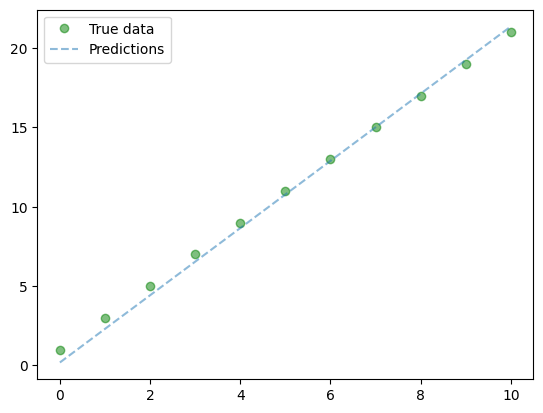

In [55]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()